In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log


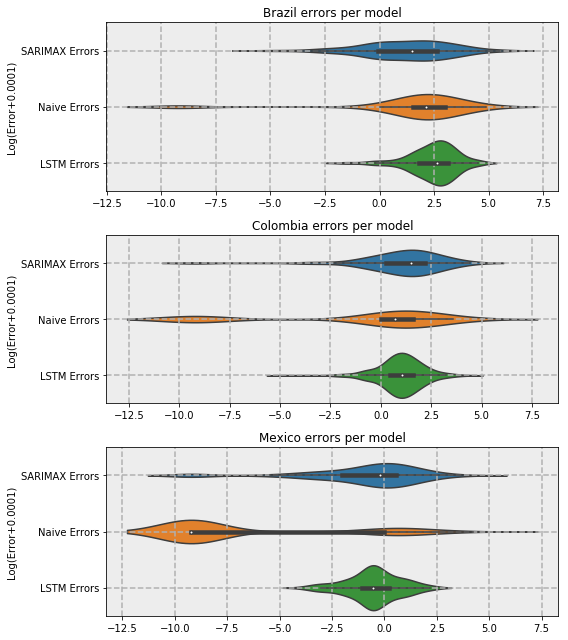

In [3]:
fig = plt.figure(figsize=(8,9))
axes = {
    "Brazil" : plt.subplot2grid((3,1), (0,0), rowspan=1, colspan=1),
    "Colombia" : plt.subplot2grid((3,1), (1, 0), rowspan=1, colspan=1),
    "Mexico" : plt.subplot2grid((3,1), (2,0), rowspan=1, colspan=1)
}

for country in ["Brazil", "Colombia", "Mexico"]:
    
    #Arimax
    ArimaxFolder = "../Models/Arimax-State"
    arimaxErrors = []
    
    for state in os.listdir("{}/{}".format(ArimaxFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/Arimax-{2}".format(ArimaxFolder, country, state))
        for error in dataset["error"].values:
            arimaxErrors.append(error+0.0001)
            
    #LSTM
    LSTMFolder = "../Models/LSTM_yearly"
    lstmErrors = []
    for state in os.listdir("{}/{}".format(LSTMFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/{2}".format(LSTMFolder, country, state))
        
        for error in dataset["error"].values:
            lstmErrors.append(error+0.0001)
            
    #Naive
    NaiveFolder = "../Models/Naive"
    naiveErrors = []
    for state in os.listdir("{}/{}".format(NaiveFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/Naive-{2}".format(NaiveFolder, country, state))
        
        for error in dataset["error"].values:
            naiveErrors.append(error+0.0001)
    
    outDataset = pd.DataFrame()
    
    #Log Scale
    arimaxErrors = np.log(arimaxErrors)
    naiveErrors = np.log(naiveErrors)
    lstmErrors = np.log(lstmErrors)
    
    
    outDataset.insert(0, "SARIMAX Errors", arimaxErrors)
    outDataset.insert(1, "Naive Errors", naiveErrors)
    outDataset.insert(2, "LSTM Errors", lstmErrors)
    
    
    ax = axes[country]
    
    ax.set_title("{} errors per model".format(country))
    sns.violinplot(data=outDataset, ax=ax, inner="box", orient="h")
    ax.set_facecolor((0.9, 0.9, 0.9, 0.7))
    ax.set_ylabel("Log(Error+0.0001)")
    ax.grid(linestyle='dashed', linewidth=1.5)
plt.tight_layout()
fig = plt.gcf()
fig.savefig("Models.png".format(country))
